In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing_preprocessing_dataset.csv')

## 1. Initial Data Exploration

In [3]:
df.head()

,house_area,bedrooms,age,distance_to_city_center,price
0,1748.357077,4.0,18.093028,7.725474,625758.853783
1,1430.867849,1.0,6.842222,7.428642,359711.871503
2,1823.844269,3.0,12.090711,6.888429,655455.373080
3,2261.514928,5.0,12.315055,0.816173,927524.082284
4,1382.923313,3.0,16.136897,1.224588,484697.352011


In [4]:
df.shape

(1050, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   house_area               1050 non-null   float64
 1   bedrooms                 939 non-null    float64
 2   age                      1050 non-null   float64
 3   distance_to_city_center  939 non-null    float64
 4   price                    1050 non-null   float64
dtypes: float64(5)
memory usage: 41.1 KB


In [6]:
df.describe()

,house_area,bedrooms,age,distance_to_city_center,price
count,1050.000000,939.000000,1050.000000,939.000000,1.050000e+03
mean,1643.708636,3.035144,21.357391,4.865416,5.585915e+05
std,811.760666,1.410379,15.525224,4.826235,1.747072e+05
min,-120.633670,1.000000,-23.705087,0.000933,9.470040e+04
25%,1199.733382,2.000000,11.295205,1.399638,4.530851e+05
50%,1534.022795,3.000000,21.768046,3.434787,5.405461e+05
75%,1877.263339,4.000000,31.532035,6.907414,6.420674e+05
max,6753.535578,5.000000,68.907366,30.209207,1.624226e+06


## 2. Handle Missing Values

In [7]:
df.isnull().sum()

house_area                   0
bedrooms                   111
age                          0
distance_to_city_center    111
price                        0
dtype: int64

In [8]:
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_19812\1066051529.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)


In [9]:
df['distance_to_city_center'].fillna(df['distance_to_city_center'].median(), inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_19812\1191157215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['distance_to_city_center'].fillna(df['distance_to_city_center'].median(), inplace=True)


## 3. Handle Duplicates

In [10]:
df.duplicated().sum()

50

In [11]:
df.drop_duplicates(keep='first')

,house_area,bedrooms,age,distance_to_city_center,price
0,1748.357077,4.0,18.093028,7.725474,625758.853783
1,1430.867849,1.0,6.842222,7.428642,359711.871503
2,1823.844269,3.0,12.090711,6.888429,655455.373080
3,2261.514928,5.0,12.315055,0.816173,927524.082284
4,1382.923313,3.0,16.136897,1.224588,484697.352011
...,...,...,...,...,...
995,1359.449854,3.0,0.704988,2.431499,490922.907415
996,2398.843263,4.0,29.210385,9.648415,690688.382358
997,1820.421431,1.0,27.925892,15.226221,445692.022665
998,1214.410505,3.0,25.248352,10.752099,455992.845109


## 4. Handle Outliers

In [12]:
from scipy import stats

def detect_outliers(df, column):
    z_scores = stats.zscore(df[column])
    threshold = 3
    return df[np.abs(z_scores) > threshold][column]

def remove_outliers(df, column):
    z_scores = stats.zscore(df[column])
    threshold = 3
    return df[np.abs(z_scores) < threshold]

### distance_to_city_center

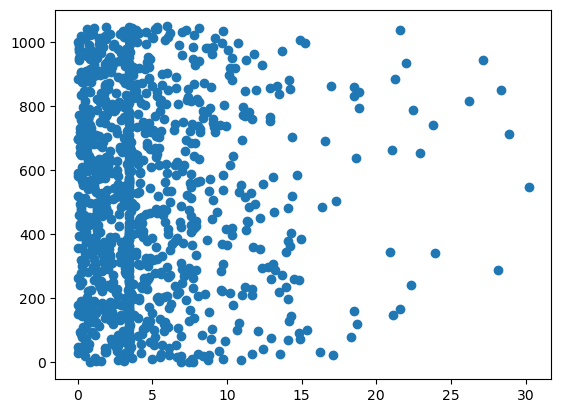

In [13]:
plt.scatter(df['distance_to_city_center'], np.arange(len(df['distance_to_city_center']))) 

In [14]:
detect_outliers(df, 'distance_to_city_center')

119     18.687613
149     21.100843
162     18.519616
167     21.610909
242     22.336462
289     28.131738
343     23.955134
345     20.947369
548     30.209207
637     18.655324
654     22.905517
664     21.057052
713     28.896657
742     23.811207
787     22.475095
794     18.816802
815     26.185326
833     18.539909
845     18.868196
851     28.369647
859     18.480523
884     21.274440
936     22.010959
943     27.173932
1039    21.610909
Name: distance_to_city_center, dtype: float64

In [15]:
df = remove_outliers(df, 'distance_to_city_center')

### bedrooms

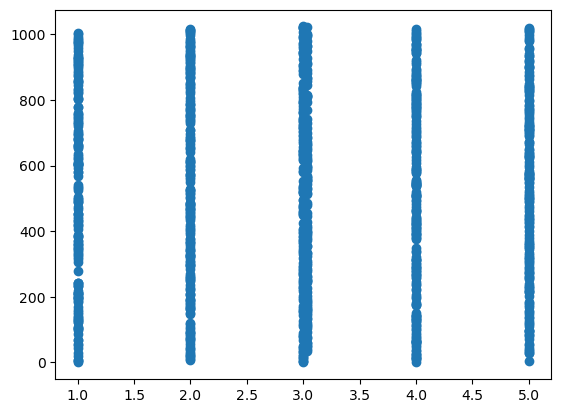

In [16]:
plt.scatter(df['bedrooms'], np.arange(len(df['bedrooms']))) 

### age

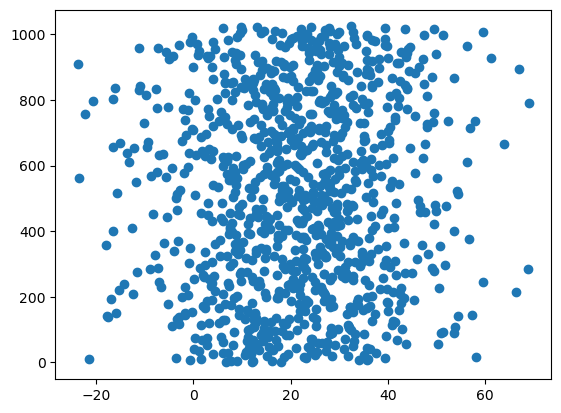

In [17]:
plt.scatter(df['age'], np.arange(len(df['age']))) 

In [18]:
detect_outliers(df,'age')

292    68.819709
808    68.907366
Name: age, dtype: float64

### price

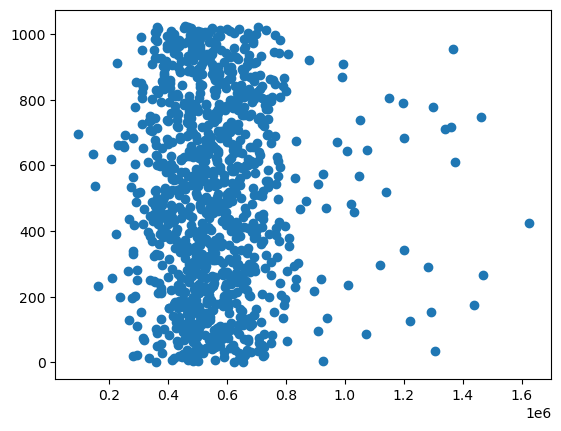

In [19]:
plt.scatter(df['price'], np.arange(len(df['price']))) 

In [20]:
detect_outliers(df,'price')

34     1.307583e+06
126    1.221028e+06
154    1.294105e+06
180    1.439686e+06
272    1.467879e+06
297    1.282612e+06
303    1.120608e+06
350    1.200462e+06
434    1.624226e+06
528    1.141884e+06
619    1.374680e+06
695    1.200653e+06
724    1.341708e+06
730    1.359883e+06
761    1.460822e+06
795    1.301026e+06
806    1.199163e+06
823    1.149612e+06
979    1.368342e+06
Name: price, dtype: float64

In [21]:
df = remove_outliers(df,'price')

### house_area

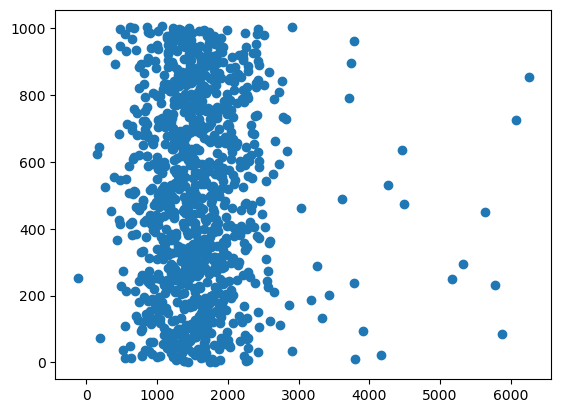

In [22]:
plt.scatter(df['house_area'], np.arange(len(df['house_area']))) 

In [23]:
detect_outliers(df,'house_area')

11      3801.405370
21      4161.335549
86      5873.103177
94      3911.837770
239     5778.650002
246     3787.582033
258     5165.729142
308     5320.646072
467     5636.261565
490     4488.041038
506     3611.409114
551     4266.484147
657     4463.812369
753     6080.462695
827     3715.709959
893     6253.943386
935     3746.918663
1006    3787.582033
Name: house_area, dtype: float64

In [24]:
df = remove_outliers(df,'house_area')

In [25]:
df.shape

(988, 5)

### regression 

In [26]:
df.corr()

,house_area,bedrooms,age,distance_to_city_center,price
house_area,1.000000,-0.032202,-0.040235,-0.034112,0.744448
bedrooms,-0.032202,1.000000,0.011764,-0.022300,0.481642
age,-0.040235,0.011764,1.000000,-0.025292,-0.131671
distance_to_city_center,-0.034112,-0.022300,-0.025292,1.000000,-0.048708
price,0.744448,0.481642,-0.131671,-0.048708,1.000000


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

x = df['house_area']
y = df['price']

# train test split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25,random_state=42)

# training
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1), y_train)

print("w = ",model.coef_)
print("b = ",model.intercept_)

# Evaluation
y_pred = model.predict(x_test.values.reshape(-1,1))
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R^2 = ",r2_score(y_test, y_pred))

w =  [190.99684533]
b =  246245.90808331076
MSE =  7820563297.227017
R^2 =  0.5796959243406257


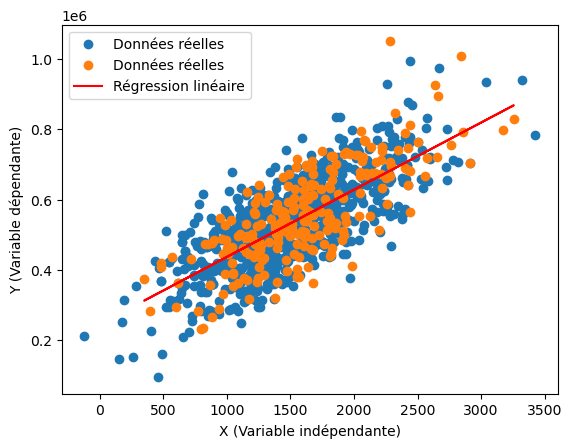

In [28]:
plt.scatter(x_train, y_train, label="Données réelles")
plt.scatter(x_test ,y_test, label="Données réelles")
plt.plot(x_test, model.predict(x_test.values.reshape(-1,1)), color='red', label="Régression linéaire")
plt.xlabel("X (Variable indépendante)")
plt.ylabel("Y (Variable dépendante)")
plt.legend()
plt.show()

## KNN

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train.values.reshape(-1, 1), y_train)

KNeighborsRegressor()

Erreur quadratique moyenne (MSE) : 10066880439.830


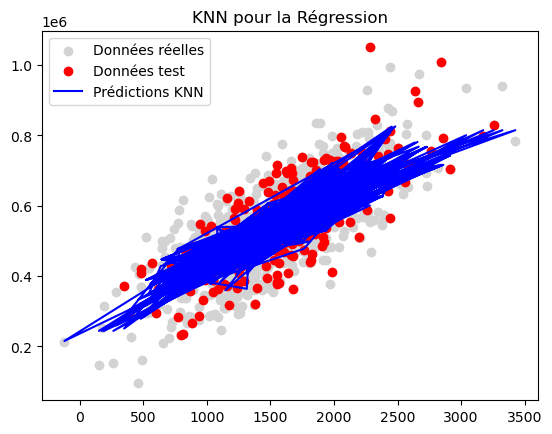

In [31]:
# Assurez-vous que le modèle KNN est ajusté avant de faire des prédictions
knn.fit(x_train.values.reshape(-1, 1), y_train)
# Prédiction sur les données test
y_pred = knn.predict(x_test.values.reshape(-1, 1))
# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse:.3f}")
# Visualisation des résultats
plt.scatter(x, y, color="lightgray", label="Données réelles")
plt.scatter(x_test, y_test, color="red", label="Données test")
plt.plot(x, knn.predict(x.values.reshape(-1, 1)), color="blue", label="Prédictions KNN")
plt.legend()
plt.title("KNN pour la Régression")
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=150, random_state=42)
rf_regressor.fit(x_train.values.reshape(-1, 1), y_train)

# prédiction
y_pred = rf_regressor.predict(x_test.values.reshape(-1, 1))

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Resultas
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Supposons que vous avez déjà votre jeu de données
x = df.drop(columns=['price'])
y = df['price']

# Séparation en jeu d'entraînement et test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Création du modèle Random Forest
rf_regressor = RandomForestRegressor(random_state=42)

# Appliquer GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Utiliser les meilleurs paramètres pour entraîner le modèle
best_rf_regressor = grid_search.best_estimator_
best_rf_regressor.fit(x_train, y_train)

# Prédiction
y_pred = best_rf_regressor.predict(x_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
238 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\dell\anaconda3\Lib\site-packages\s

Meilleurs hyperparamètres: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 48137.40
MSE: 4159029268.73
R2 Score: 0.77


## Decision Trees

MAE (Erreur absolue moyenne)     : 49787.05
MSE (Erreur quadratique moyenne) : 4185017377.08
R² Score                         : 0.77


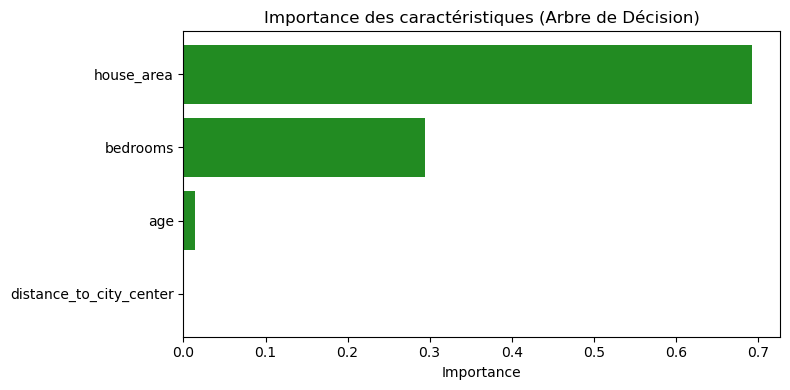

In [34]:
from sklearn.tree import DecisionTreeRegressor

# Création et entraînement du modèle d'arbre de décision
tree = DecisionTreeRegressor(max_depth=5, min_samples_split=4, min_samples_leaf=2, random_state=42)
tree.fit(x_train, y_train)

# Prédictions
y_pred = tree.predict(x_test)

# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des métriques
print(f"MAE (Erreur absolue moyenne)     : {mae:.2f}")
print(f"MSE (Erreur quadratique moyenne) : {mse:.2f}")
print(f"R² Score                         : {r2:.2f}")

# Visualisation de l’importance des caractéristiques
importances = tree.feature_importances_
features = x.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(8, 4))
plt.barh(features[sorted_idx], importances[sorted_idx], color='forestgreen')
plt.xlabel("Importance")
plt.title("Importance des caractéristiques (Arbre de Décision)")
plt.tight_layout()
plt.show()


## Visualisation de l'Arbre de Décision

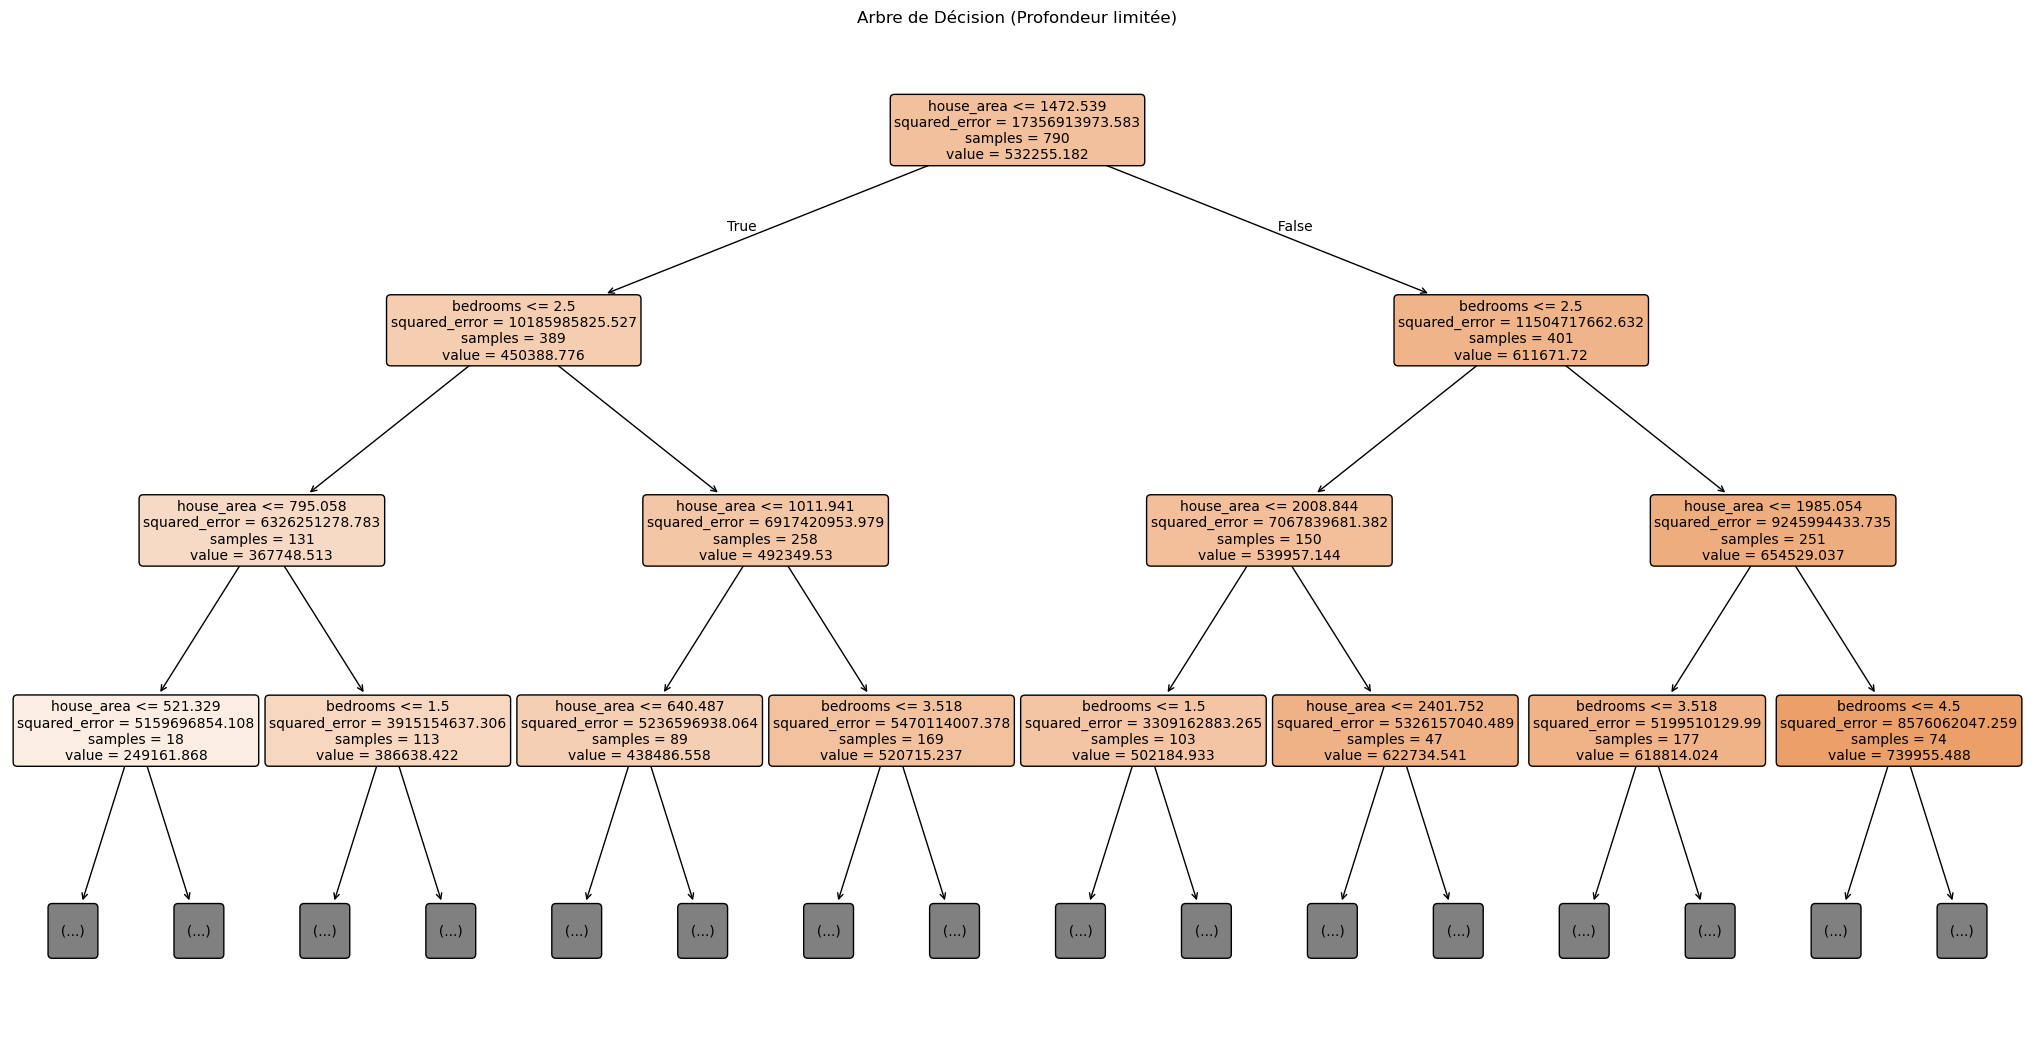

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(26, 13))
plot_tree(tree, 
          feature_names=x.columns,  # ou liste manuelle
          filled=True, 
          rounded=True,
          max_depth=3,  # Limite l'affichage à 3 niveaux
          fontsize=10)
plt.title("Arbre de Décision (Profondeur limitée)")
plt.show()


#### - Pour savoir est-ce qu'il y a le surapprentissage(Overfitting)

In [36]:
from sklearn.metrics import r2_score

# Prédictions
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

# R2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² Entraînement : {r2_train:.2f}")
print(f"R² Test: {r2_test:.2f}")


R² Entraînement : 0.82
R² Test: 0.77


## SVM

In [37]:
from sklearn.svm import SVR

# Normalisation (très importante pour SVM !)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(x_train)
X_test_scaled = scaler_X.transform(x_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Initialisation et entraînement du modèle SVR
svr = SVR(kernel='rbf')  # kernel peut être 'linear', 'poly', 'rbf', 'sigmoid'
svr.fit(X_train_scaled, y_train_scaled)

# Prédiction
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"R² Score : {r2:.2f}")


MAE : 48222.13
MSE : 4079664426.04
R² Score : 0.78
